In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv(r'C:\Users\kirch\OneDrive\Dokumente\Uni\Mannheim\FSS2022\Teamproject\Data\train.csv')

In [3]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


- trip duration in seconds

In [4]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [5]:
# missing values
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

- the dataset is complete (no missing values)

In [6]:
# remove obvious outliers
allLat  = np.array(list(df['pickup_latitude'])  + list(df['dropoff_latitude']))
allLong = np.array(list(df['pickup_longitude']) + list(df['dropoff_longitude']))

longLimits = [np.percentile(allLong, 0.3), np.percentile(allLong, 99.7)]
latLimits  = [np.percentile(allLat , 0.3), np.percentile(allLat , 99.7)]
durLimits  = [np.percentile(df['trip_duration'], 0.4), np.percentile(df['trip_duration'], 99.7)]

df = df[(df['pickup_latitude']   >= latLimits[0] ) & (df['pickup_latitude']   <= latLimits[1]) ]
df = df[(df['dropoff_latitude']  >= latLimits[0] ) & (df['dropoff_latitude']  <= latLimits[1]) ]
df = df[(df['pickup_longitude']  >= longLimits[0]) & (df['pickup_longitude']  <= longLimits[1])]
df = df[(df['dropoff_longitude'] >= longLimits[0]) & (df['dropoff_longitude'] <= longLimits[1])]
df = df[(df['trip_duration']     >= durLimits[0] ) & (df['trip_duration']     <= durLimits[1]) ]
df = df.reset_index(drop=True)

#allLat  = np.array(list(df['pickup_latitude'])  + list(df['dropoff_latitude']))
#allLong = np.array(list(df['pickup_longitude']) + list(df['dropoff_longitude']))

In [7]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1420053,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1420054,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1420055,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1420056,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


C:\Users\kirch\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


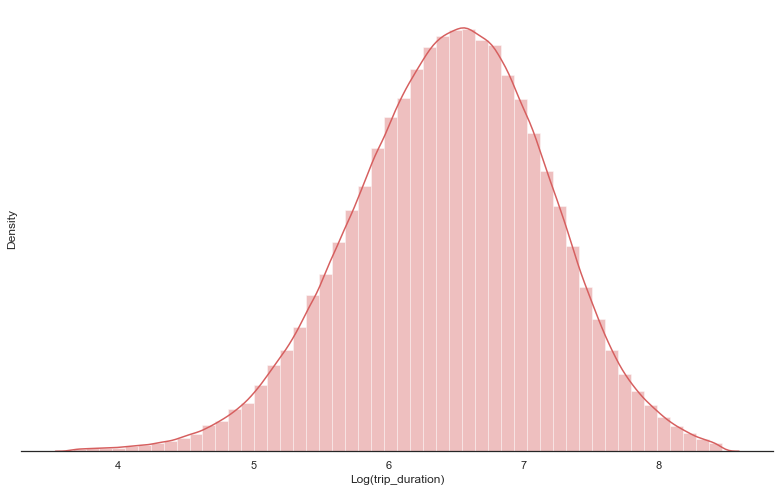

In [8]:
%matplotlib inline
#start = time.time()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(df['trip_duration'].values+1), axlabel = 'Log(trip_duration)', label = 'log(trip_duration)', bins = 50, color="r")
plt.setp(axes, yticks=[])
plt.tight_layout()
#end = time.time()
#print("Time taken by above cell is {}.".format((end-start)))
plt.show()

- Gaussian distribution
- most trips take between e^4 (~1 minute) and e^8 (~50 minutes)

C:\Users\kirch\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kirch\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kirch\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

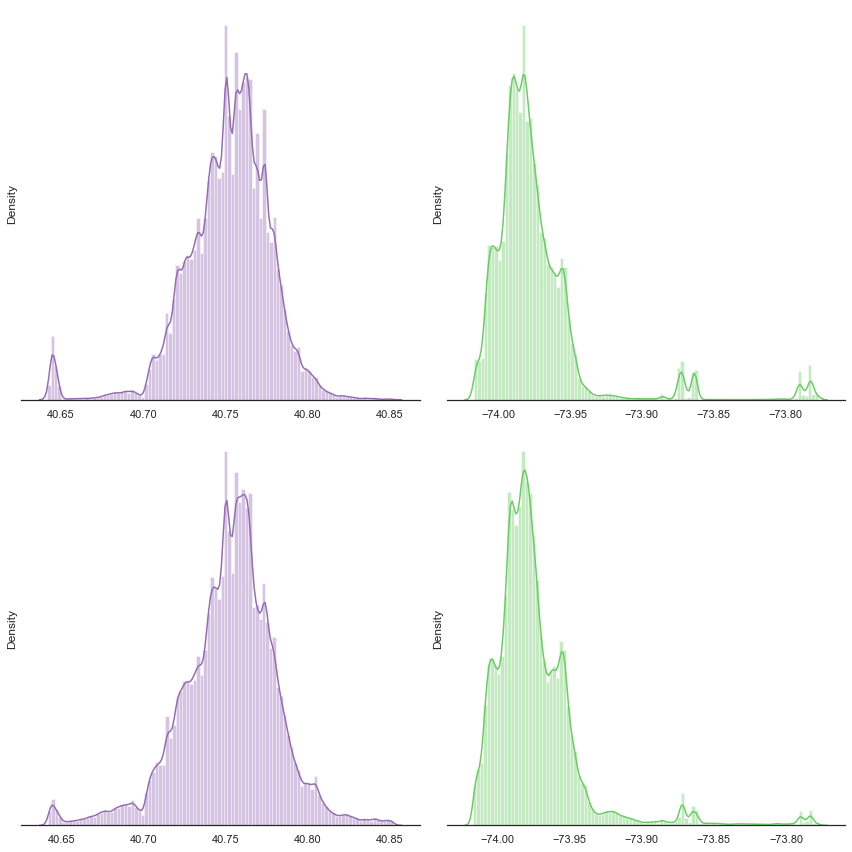

In [9]:
df2 = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df2 = df2.loc[(df2.dropoff_latitude>40.6) & (df2.dropoff_latitude < 40.9)]
df2 = df2.loc[(df2.dropoff_longitude > -74.05) & (df2.dropoff_longitude < -73.7)]
df2 = df2.loc[(df2.pickup_longitude > -74.05) & (df2.pickup_longitude < -73.7)]
train_data_new = df2.copy()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(12, 12), sharex=False, sharey = False)#
sns.despine(left=True)
sns.distplot(train_data_new['pickup_latitude'].values, label = 'pickup_latitude',color="m",bins = 100, ax=axes[0,0])
sns.distplot(train_data_new['pickup_longitude'].values, label = 'pickup_longitude',color="g",bins =100, ax=axes[0,1])
sns.distplot(train_data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="m",bins =100, ax=axes[1, 0])
sns.distplot(train_data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="g",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
#print(df.shape[0], train_data.shape[0])
plt.show()

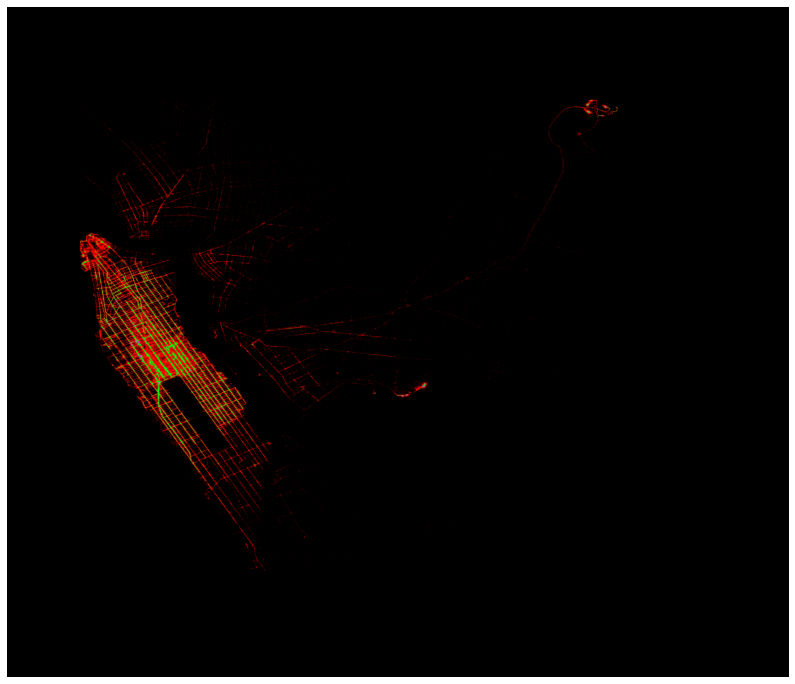

In [10]:
rgb = np.zeros((3000, 3500, 3), dtype=np.uint8)
rgb[..., 0] = 0
rgb[..., 1] = 0
rgb[..., 2] = 0
train_data_new['pick_lat_new'] = list(map(int, (train_data_new['pickup_latitude'] - (40.6000))*10000))
train_data_new['drop_lat_new'] = list(map(int, (train_data_new['dropoff_latitude'] - (40.6000))*10000))
train_data_new['pick_lon_new'] = list(map(int, (train_data_new['pickup_longitude'] - (-74.050))*10000))
train_data_new['drop_lon_new'] = list(map(int,(train_data_new['dropoff_longitude'] - (-74.050))*10000))

summary_plot = pd.DataFrame(train_data_new.groupby(['pick_lat_new', 'pick_lon_new'])['id'].count())

summary_plot.reset_index(inplace = True)
summary_plot.head(120)
lat_list = summary_plot['pick_lat_new'].unique()
for i in lat_list:
    lon_list = summary_plot.loc[summary_plot['pick_lat_new']==i]['pick_lon_new'].tolist()
    unit = summary_plot.loc[summary_plot['pick_lat_new']==i]['id'].tolist()
    for j in lon_list:
        a = unit[lon_list.index(j)]
        if (a//50) >0:
            rgb[i][j][0] = 255
            rgb[i,j, 1] = 0
            rgb[i,j, 2] = 255
        elif (a//10)>0:
            rgb[i,j, 0] = 0
            rgb[i,j, 1] = 255
            rgb[i,j, 2] = 0
        else:
            rgb[i,j, 0] = 255
            rgb[i,j, 1] = 0
            rgb[i,j, 2] = 0
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(14,20))
ax.imshow(rgb, cmap = 'hot')
ax.set_axis_off()

- Red points signifies that 1-10 trips in the given data have that point as pickup point
- Green points signifies that more than 10-50 trips in the given data have that point as pickup point
- Yellow points signifies that more than 50+ trips in the given data have that point as pickup point

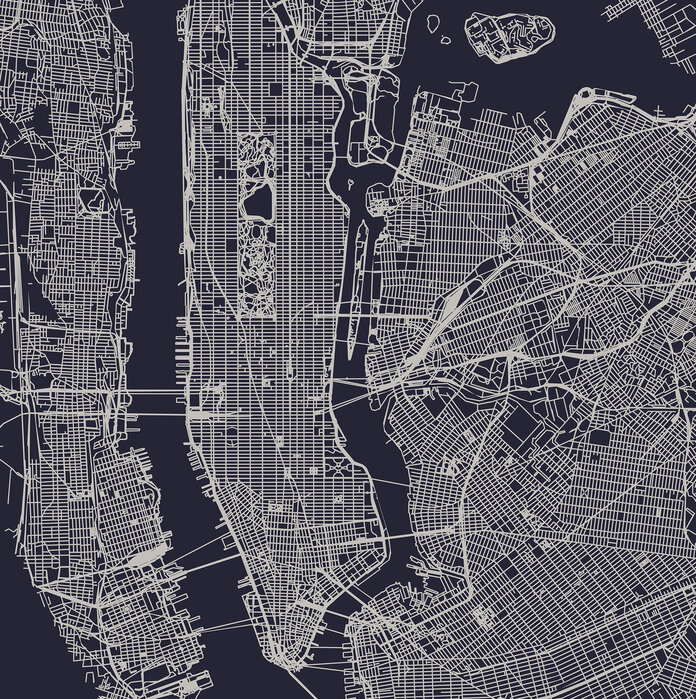

In [61]:
from IPython.display import Image
Image("new-york-city-map.jpg")

# map of New York for reference

### Feature Engineering

- create the following features:
    - month
    - hour
    - week of year
    - day of year
    - day of week
    - weekend

In [12]:
data = df.copy()
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1420053,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1420054,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1420055,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1420056,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [13]:
df['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)

In [14]:
df.loc[:, 'pick_month'] = df['pickup_datetime'].dt.month
df.loc[:, 'pick_hour'] = df['pickup_datetime'].dt.hour
df.loc[:, 'pick_week_of_year'] = df['pickup_datetime'].dt.isocalendar().week
df.loc[:, 'pick_day_of_year'] = df['pickup_datetime'].dt.dayofyear
df.loc[:, 'pick_day_of_week'] = df['pickup_datetime'].dt.dayofweek

In [15]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_month,pick_hour,pick_week_of_year,pick_day_of_year,pick_day_of_week
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,17,11,74,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0,23,164,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11,3,19,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,19,14,97,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,13,12,86,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420053,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,4,13,14,99,4
1420054,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,1,7,1,10,6
1420055,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,4,6,16,113,4
1420056,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1,15,1,5,1


In [16]:
df['weekend'] = np.zeros(len(df))

df.loc[df['pick_day_of_week'] >= 5, 'weekend'] = 1

In [17]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_month,pick_hour,pick_week_of_year,pick_day_of_year,pick_day_of_week,weekend
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,17,11,74,0,0.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0,23,164,6,1.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11,3,19,1,0.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,19,14,97,2,0.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,13,12,86,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420053,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,4,13,14,99,4,0.0
1420054,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,1,7,1,10,6,1.0
1420055,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,4,6,16,113,4,0.0
1420056,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1,15,1,5,1,0.0


## Get most frequent coordinates for pickup and dropoff

In [18]:
df['pickup_longitude'].mode()

0   -73.982201
dtype: float64

In [19]:
counter = 0
for i in range(len(df)):
    if df['pickup_longitude'][i] == -73.982201:
        counter += 1
print(counter)

0


In [20]:
# sort dataframe by value pair pickup_long and pickup_lat
top_pickup = df.groupby(["pickup_longitude", "pickup_latitude"]).size().sort_values(ascending=False)

# sort dataframe by value pair dropoff_long and dropff_lat
top_dropoff = df.groupby(["dropoff_longitude", "dropoff_latitude"]).size().sort_values(ascending=False)

In [21]:
len(top_pickup)

1348167

In [22]:
len(df) - len(top_pickup)

71891

only 71,891 coordinates arise more than once

In [23]:
top_pickup.head(20)

pickup_longitude  pickup_latitude
-73.954666        40.821003          39
-73.870872        40.773762          14
-73.870934        40.773788          14
-73.873009        40.774181          14
-73.994072        40.751202          13
-73.873039        40.774158          13
-73.870911        40.773762          13
-73.870872        40.773701          13
-73.870956        40.773811          13
-73.870872        40.773739          13
-73.873009        40.774151          12
-73.872971        40.774151          12
-73.873039        40.774101          12
-73.870911        40.773769          12
-73.870850        40.773731          12
-73.870888        40.773762          12
-73.870880        40.773739          12
-73.870888        40.773750          12
-73.870934        40.773769          12
-73.870857        40.773731          11
dtype: int64

In [24]:
top_dropoff.head(20)

dropoff_longitude  dropoff_latitude
-73.954666         40.821003           39
-74.002769         40.760578           10
-73.994682         40.750389           10
-74.002769         40.760551            9
-73.994659         40.750408            8
-73.994667         40.750462            8
                   40.750370            8
-73.992149         40.749321            7
-73.994637         40.750439            7
-73.991264         40.750149            7
-73.861816         40.768410            7
-73.863319         40.769485            7
-73.861748         40.768398            7
-73.865128         40.770592            7
-73.861778         40.768398            7
-73.994621         40.750462            7
-74.002762         40.760609            7
-74.002823         40.760509            7
-73.994911         40.750141            6
-74.002792         40.760551            6
dtype: int64

In [25]:
type(top_pickup)
top_pickup_np = top_pickup.to_numpy()

In [26]:
top_pickup_np

array([39, 14, 14, ...,  1,  1,  1], dtype=int64)

In [43]:
type(top_dropoff)
top_dropoff_np = top_dropoff.to_numpy()

### Clustering of pickup coordinates

In [28]:
from sklearn.cluster import KMeans

In [29]:
X = np.zeros((len(df), 2))

In [30]:
X[:,0] = df['pickup_latitude']
X[:,1] = df['pickup_longitude']
X

array([[ 40.76793671, -73.98215485],
       [ 40.73856354, -73.98041534],
       [ 40.7639389 , -73.97902679],
       ...,
       [ 40.76879883, -73.95912933],
       [ 40.74906158, -73.98207855],
       [ 40.78174973, -73.97953796]])

In [31]:
kmeans = KMeans(n_clusters=20, random_state=42)

In [32]:
kmeans.fit(X)

KMeans(n_clusters=20, random_state=42)

In [33]:
cluster_labels = kmeans.labels_

In [34]:
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 20,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [35]:
X_clustered = pd.DataFrame(X)

In [36]:
X_clustered['cluster'] = cluster_labels
X_clustered

,0,1,cluster
0,40.767937,-73.982155,5
1,40.738564,-73.980415,15
2,40.763939,-73.979027,5
3,40.719971,-74.010040,4
4,40.793209,-73.973053,6
...,...,...,...
1420053,40.745522,-73.982201,14
1420054,40.747379,-74.000946,8
1420055,40.768799,-73.959129,0
1420056,40.749062,-73.982079,14


In [37]:
cluster_centers = X_clustered.groupby(['cluster']).mean()

In [38]:
cluster_centers

,0,1
cluster,,
0,40.770164,-73.959387
1,40.748543,-73.991145
2,40.647083,-73.786265
3,40.770330,-73.868987
4,40.711347,-74.010229
5,40.764148,-73.982230
6,40.794189,-73.969462
7,40.724631,-73.987883
8,40.741060,-74.002535


In [39]:
cluster_centers_ = cluster_centers.to_numpy()

## Clustering of dropoff coordinates

In [44]:
X_dropoff = np.zeros((len(df), 2))

In [45]:
X_dropoff[:,0] = df['dropoff_latitude']
X_dropoff[:,1] = df['dropoff_longitude']
X_dropoff

array([[ 40.76560211, -73.96463013],
       [ 40.73115158, -73.9994812 ],
       [ 40.71008682, -74.00533295],
       ...,
       [ 40.70737076, -74.00443268],
       [ 40.75710678, -73.97463226],
       [ 40.79058456, -73.97280884]])

In [46]:
kmeans_dropoff = KMeans(n_clusters=20, random_state=42)

In [47]:
kmeans_dropoff.fit(X_dropoff)

KMeans(n_clusters=20, random_state=42)

In [48]:
cluster_labels_dropoff = kmeans_dropoff.labels_

In [49]:
# create pandas dataframe
X_clustered_dropoff = pd.DataFrame(X_dropoff)

In [50]:
# add cluster labels to dropoff dataframe
X_clustered_dropoff['cluster'] = cluster_labels_dropoff
X_clustered_dropoff

,0,1,cluster
0,40.765602,-73.964630,15
1,40.731152,-73.999481,10
2,40.710087,-74.005333,8
3,40.706718,-74.012268,8
4,40.782520,-73.972923,6
...,...,...,...
1420053,40.740170,-73.994911,10
1420054,40.796547,-73.970184,6
1420055,40.707371,-74.004433,8
1420056,40.757107,-73.974632,17


In [51]:
cluster_centers_dropoff = X_clustered_dropoff.groupby(['cluster']).mean()

In [52]:
cluster_centers_dropoff

,0,1
cluster,,
0,40.770401,-73.983561
1,40.725456,-73.989240
2,40.648515,-73.788542
3,40.771443,-73.868356
4,40.779388,-73.953263
5,40.674397,-73.960034
6,40.789267,-73.973224
7,40.832062,-73.934514
8,40.713592,-74.008709


In [53]:
# transform pandas df into numpy array for the folium library
cluster_centers_dropoff_ = cluster_centers_dropoff.to_numpy()

# Map of New York

In [40]:
import folium
from folium.plugins import MarkerCluster

#### Cluster centroids of pickup coordinates

In [58]:
#Create the map
map_pickup = folium.Map(location = boulder_coords, zoom_start = 13)

#Add 20 cluster centroids to the map
for i in range(20):
    folium.Marker([cluster_centers_[i,0],cluster_centers_[i,1]], popup = f"cluster {i}").add_to(map_pickup)

#Display the map
map_pickup

#### Cluster centroids of dropoff coordinates

In [57]:
#Create the map
map_dropoff = folium.Map(location = boulder_coords, zoom_start = 13)

for i in range(20):
    folium.Marker([cluster_centers_dropoff_[i,0],cluster_centers_dropoff_[i,1]], popup = f"cluster {i}").add_to(map_dropoff)

#Display the map
map_dropoff

#### Pickup and dropoff in a single map

In [60]:
#Create the map
map_pickup_dropoff = folium.Map(location = boulder_coords, zoom_start = 13)

#Add markers to the map
for i in range(20):
    folium.RegularPolygonMarker([cluster_centers_dropoff_[i,0],cluster_centers_dropoff_[i,1]], popup = f"dropoff cluster {i}", fill_color = '#00ff40',
                            number_of_sides = 3, radius = 10).add_to(map_pickup_dropoff)
    folium.RegularPolygonMarker([cluster_centers_[i,0],cluster_centers_[i,1]], popup = f"pickup cluster {i}", fill_color = '#ff0000',
                            number_of_sides = 8, radius = 10).add_to(map_pickup_dropoff)

# Display the map
map_pickup_dropoff

- pickup and dropoff cluster centroids are sometimes very close to each other, such that they can be merged in some cases